In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# install alpaca-py if it is not available
try:
    import alpaca
except ImportError:
    !python3 -m pip install alpaca-py
    import alpaca

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 kB 3.8 MB/s eta 0:00:00


In [ ]:
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime
from google.colab import userdata

In [ ]:
paper = True
trade_api_url = None
trade_api_wss = None
data_api_url = None
stream_data_wss = None
key = userdata.get('alpaca_key')
secret = userdata.get('alpaca_secret')

In [281]:
# @title Get Historical Data

#

client = StockHistoricalDataClient(key, secret)

SPY_params = StockBarsRequest(symbol_or_symbols=["SPY"],
                        timeframe=TimeFrame.Day,
                        start=datetime(2016, 1, 4),
                        end=datetime(2025, 1, 1))
GLD_params = StockBarsRequest(symbol_or_symbols=["GLD"],
                        timeframe=TimeFrame.Day,
                        start=datetime(2016, 1, 4),
                        end=datetime(2025, 1, 1))
TLT_params = StockBarsRequest(symbol_or_symbols=["TLT"],
                        timeframe=TimeFrame.Day,
                        start=datetime(2016, 1, 4),
                        end=datetime(2025, 1, 1))
SPY_bars = client.get_stock_bars(SPY_params).df
GLD_bars = client.get_stock_bars(GLD_params).df
TLT_bars = client.get_stock_bars(TLT_params).df

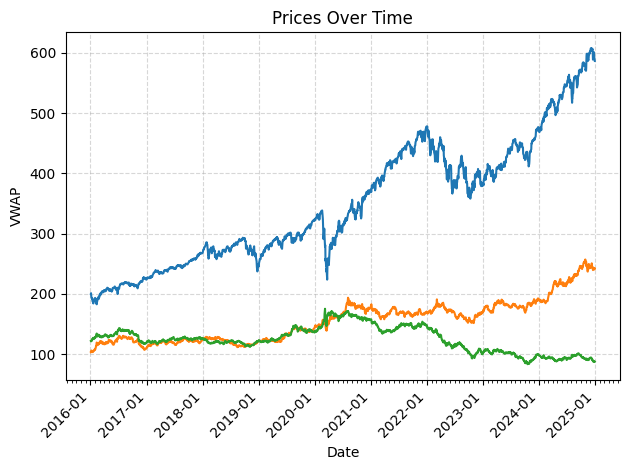

In [282]:
# @title prices over time
from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker


plt.plot(SPY_bars.index.levels[1].date, SPY_bars.vwap)
plt.plot(GLD_bars.index.levels[1].date, GLD_bars.vwap)
plt.plot(TLT_bars.index.levels[1].date, TLT_bars.vwap)

# Format the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Major ticks every year
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator()) # Minor ticks every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Format as Year-Month
plt.xticks(rotation=45, ha='right')

# Add labels, title, and legend
plt.xlabel("Date")
plt.ylabel("VWAP")
plt.title("Prices Over Time")

# Add gridlines
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [298]:
SPY_bars

open      high       low     close  \
symbol timestamp                                                          
SPY    2016-01-04 05:00:00+00:00  200.490  201.0300  198.5900  201.0192   
       2016-01-05 05:00:00+00:00  201.405  201.9000  200.0500  201.3600   
       2016-01-06 05:00:00+00:00  198.330  200.0600  197.6000  198.8200   
       2016-01-07 05:00:00+00:00  195.330  197.4400  193.5900  194.0500   
       2016-01-08 05:00:00+00:00  195.190  195.8500  191.5800  191.9230   
...                                   ...       ...       ...       ...   
       2024-12-24 05:00:00+00:00  596.060  601.3400  595.4700  601.3000   
       2024-12-26 05:00:00+00:00  599.500  602.4800  598.0825  601.3400   
       2024-12-27 05:00:00+00:00  597.540  597.7761  590.7647  595.0100   
       2024-12-30 05:00:00+00:00  587.890  591.7400  584.4100  588.2200   
       2024-12-31 05:00:00+00:00  589.905  590.6399  584.4200  586.0800   

                                       volume  trade_count        vwap  \
symbol timestamp                                                         
SPY    2016-01-04 05:00:00+00:00  225903783.0     655489.0  199.753436   
       2016-01-05 05:00:00+00:00  112719152.0     418709.0  201.085380   
       2016-01-06 05:00:00+00:00  153948196.0     548386.0  198.839872   
       2016-01-07 05:00:00+00:00  216191953.0     796451.0  195.202134   
       2016-01-08 05:00:00+00:00  216105404.0     754102.0  193.673322   
...                                       ...          ...         ...   
       2024-12-24 05:00:00+00:00   33160097.0     235911.0  599.291931   
       2024-12-26 05:00:00+00:00   41338891.0     306002.0  600.982138   
       2024-12-27 05:00:00+00:00   64969310.0     497465.0  594.049471   
       2024-12-30 05:00:00+00:00   56578757.0     501195.0  588.344096   
       2024-12-31 05:00:00+00:00   57052654.0     479945.0  586.638607   

                                   int_ret  
symbol timestamp                            
SPY    2016-01-04 05:00:00+00:00  0.002640  
       2016-01-05 05:00:00+00:00 -0.000223  
       2016-01-06 05:00:00+00:00  0.002471  
       2016-01-07 05:00:00+00:00 -0.006553  
       2016-01-08 05:00:00+00:00 -0.016738  
...                                    ...  
       2024-12-24 05:00:00+00:00  0.008791  
       2024-12-26 05:00:00+00:00  0.003069  
       2024-12-27 05:00:00+00:00 -0.004234  
       2024-12-30 05:00:00+00:00  0.000561  
       2024-12-31 05:00:00+00:00 -0.006484  

[2264 rows x 8 columns]

In [284]:
# Find inter-day returns of SPY
SPY_bars['int_ret'] = (SPY_bars['close'] / SPY_bars['open']) - 1
GLD_bars['int_ret'] = (GLD_bars['close'] / GLD_bars['open']) - 1
TLT_bars['int_ret'] = (TLT_bars['close'] / TLT_bars['open']) - 1



```
# Rebalance portfolio monthly based on historical volatility
```

# Risk Parity Strategy

In [285]:
# @title Find the forcasted volatility of the inter-day returns

spy_std = SPY_bars.resample('ME', level = 'timestamp').int_ret.std()
spy_forcastedvol = spy_std * np.sqrt(252)

gld_std = GLD_bars.resample('ME', level = 'timestamp').int_ret.std()
gld_forcastedvol = gld_std * np.sqrt(252)

tlt_std = TLT_bars.resample('ME', level = 'timestamp').int_ret.std()
tlt_forcastedvol = tlt_std * np.sqrt(252)


print('SPY',spy_forcastedvol.mean())
print('GLD',gld_forcastedvol.mean())
print('TLT',tlt_forcastedvol.mean())


#


SPY 0.11416028706780651
GLD 0.08540627981456216
TLT 0.0930536936806626


In [286]:
# @title Define the targeted annualized volatility
total_target_vol = 0.1
spy_target_vol = total_target_vol/3
gld_target_vol = total_target_vol/3
tlt_target_vol = total_target_vol/3


In [290]:
# @title Find the position weight for each class
spy_position_weight = spy_target_vol / spy_forcastedvol
gld_position_weight = gld_target_vol / gld_forcastedvol
tlt_position_weight = tlt_target_vol / tlt_forcastedvol

for i in range(len(spy_position_weight)):
  sum = spy_position_weight[i] + gld_position_weight[i] + tlt_position_weight[i]
  spy_position_weight[i] /= sum
  gld_position_weight[i] /= sum
  tlt_position_weight[i] /= sum


<ipython-input-290-7c86bd0b4bcf>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum = spy_position_weight[i] + gld_position_weight[i] + tlt_position_weight[i]
<ipython-input-290-7c86bd0b4bcf>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spy_position_weight[i] /= sum
<ipython-input-290-7c86bd0b4bcf>:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  spy_position_weight[i] /= sum
<ipython-input-290-7c86bd0b4bcf>:9: FutureWarn

In [ ]:
# @title Plot chart of position weights for each month

for i in range(len(spy_position_weight)):
  weight = [spy_position_weight[i], gld_position_weight[i], tlt_position_weight[i]]
  plt.figure(i)
  plt.pie( weight, labels = ['SPY', 'GLD', 'TLT'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.5)
  plt.title(str(spy_position_weight.index[i].month) + '/' + str(spy_position_weight.index[i].year))
plt.show()



In [291]:
# @title Setup dataframe for price each month
spy_price = SPY_bars.resample('ME', level = 'timestamp').vwap.last()
gld_price = GLD_bars.resample('ME', level = 'timestamp').vwap.last()
tlt_price = TLT_bars.resample('ME', level = 'timestamp').vwap.last()


In [292]:
# @title Create Backtest

#initialize balance
balance = [10000]

#buy at beginning of each month and sell at end of each month
for i in range(len(spy_position_weight)-1):
  spy_amt = spy_position_weight[i] * balance[i]
  gld_amt = gld_position_weight[i] * balance[i]
  tlt_amt = tlt_position_weight[i] * balance[i]

  balance.append(spy_amt/spy_price[i] * spy_price[i+1] + gld_amt/gld_price[i] * gld_price[i+1] + tlt_amt/tlt_price[i] * tlt_price[i+1])

#convert to dataframe
df = pd.DataFrame(balance, index= spy_position_weight.index)



<ipython-input-292-4e53174b93e0>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spy_amt = spy_position_weight[i] * balance[i]
<ipython-input-292-4e53174b93e0>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gld_amt = gld_position_weight[i] * balance[i]
<ipython-input-292-4e53174b93e0>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tlt_amt = tlt_position_weight[i] * balance[i]
<ipython-input-292-4e53174b93e0>:12: FutureWarning:

In [295]:
spy_price.index

DatetimeIndex(['2016-01-31 00:00:00+00:00', '2016-02-29 00:00:00+00:00',
               '2016-03-31 00:00:00+00:00', '2016-04-30 00:00:00+00:00',
               '2016-05-31 00:00:00+00:00', '2016-06-30 00:00:00+00:00',
               '2016-07-31 00:00:00+00:00', '2016-08-31 00:00:00+00:00',
               '2016-09-30 00:00:00+00:00', '2016-10-31 00:00:00+00:00',
               ...
               '2024-03-31 00:00:00+00:00', '2024-04-30 00:00:00+00:00',
               '2024-05-31 00:00:00+00:00', '2024-06-30 00:00:00+00:00',
               '2024-07-31 00:00:00+00:00', '2024-08-31 00:00:00+00:00',
               '2024-09-30 00:00:00+00:00', '2024-10-31 00:00:00+00:00',
               '2024-11-30 00:00:00+00:00', '2024-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='timestamp', length=108, freq='ME')

<ipython-input-297-23a19b1107eb>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(10000/spy_price[0]*spy_price)


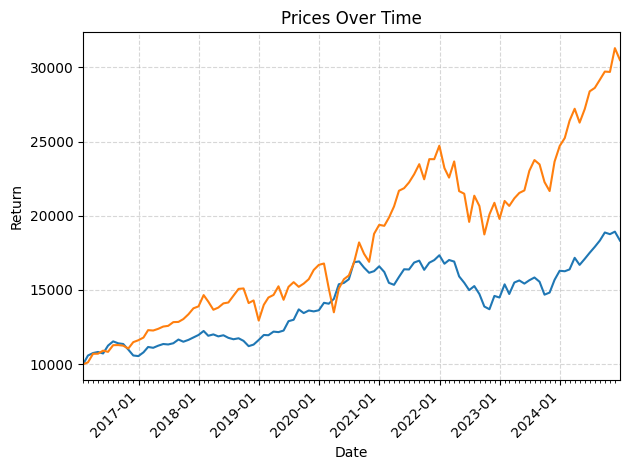

In [297]:
# @title

plt.plot(df)
plt.plot(10000/spy_price[0]*spy_price)
plt.plot(10000)

# Format the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Major ticks every year
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator()) # Minor ticks every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Format as Year-Month
plt.xticks(rotation=45, ha='right')
start_date = spy_price.index.min()
end_date = spy_price.index.max()
plt.xlim(start_date, end_date)
# Add labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Prices Over Time")

# Add gridlines
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()